# **EDA and EMA on IPL Data**
# -By Ashwin Prakash




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Download the Dataset from the link below 

In [ ]:
ipl_data = pd.read_csv("https://drive.google.com/u/0/uc?id=1xMIOuGce8zig16sDQcTf7pXkRYfvQyp8&export=download")

In [ ]:
ipl_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


##**Data Preprocessing**

In [ ]:
rows = ipl_data.shape[0]
columns = ipl_data.shape[1]

print(f"The number of rows in the data is {rows}")
print(f"The number of columns in the data is {columns}")

The number of rows in the data is 76014
The number of columns in the data is 15


In [ ]:
#Checking NULL values
ipl_data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [ ]:
#Dropping unnecessary columns
column_drop_list = ['mid','striker','non-striker']
ipl_data.drop(column_drop_list, axis=1, inplace=True)


In [ ]:
ipl_data.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,222


In [ ]:
#Displaying the teams present in the dataset
print(np.unique(ipl_data['bat_team']))

['Chennai Super Kings' 'Deccan Chargers' 'Delhi Daredevils'
 'Gujarat Lions' 'Kings XI Punjab' 'Kochi Tuskers Kerala'
 'Kolkata Knight Riders' 'Mumbai Indians' 'Pune Warriors'
 'Rajasthan Royals' 'Rising Pune Supergiant' 'Rising Pune Supergiants'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad']


In [ ]:
#Removing teams which are not playing right now
old_teams = ['Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Gujarat Lions', 'Rising Pune Supergiant', 'Rising Pune Supergiants']
current_teams = [teams for teams in ipl_data['bat_team'] if teams not in old_teams]

#Changing the dataframe to the changes
ipl_data = ipl_data[ipl_data['bat_team'].isin(current_teams) & ipl_data['bowl_team'].isin(current_teams)]

In [ ]:
np.unique(ipl_data['bat_team'])

array(['Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

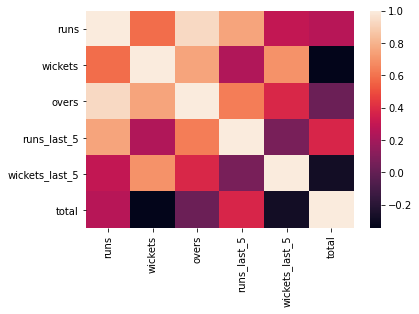

In [ ]:
#checking correletion between the features
ipl_data.corr(method='pearson')

#plot a heatmap using seaborn to display correlation
import seaborn as sns
sns.heatmap(ipl_data.corr())

In [ ]:
#encode the categorical columns
cat_columns = ['venue',	'bat_team','bowl_team','batsman' ,'bowler']

#checking unique values in categorical columns
for cat in cat_columns:
  print(f'Number of unique values in {cat} = {np.unique(ipl_data[cat]).shape[0]}')

Number of unique values in venue = 31
Number of unique values in bat_team = 8
Number of unique values in bowl_team = 8
Number of unique values in batsman = 349
Number of unique values in bowler = 275


In [ ]:
#Since batsman and bowler features have high cardinality, we will use label encoder for these
from sklearn.preprocessing import LabelEncoder

le_columns = ['batsman', 'bowler', 'venue']
le = LabelEncoder()

for col in le_columns:
  ipl_data[col] = le.fit_transform(ipl_data[col]) #label encoding

In [ ]:
ipl_data.head(30)

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,276,168,1,0,0.1,1,0,222
1,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,1,0,0.2,1,0,222
2,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0,0.2,2,0,222
3,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0,0.3,2,0,222
4,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0,0.4,2,0,222
5,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,2,0,0.5,2,0,222
6,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,168,3,0,0.6,3,0,222
7,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,274,3,0,1.1,3,0,222
8,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,274,7,0,1.2,7,0,222
9,2008-04-18,13,Kolkata Knight Riders,Royal Challengers Bangalore,49,274,11,0,1.3,11,0,222


In [ ]:
#The rest of columns do not have high cardinality so we use one hot encoder
ohe_columns = ['bat_team', 'bowl_team']

#one hot encoding using pd.get_dummies and concat to original dataframe
ipl_data = pd.concat((ipl_data, pd.get_dummies(ipl_data[ohe_columns])), axis=1)

In [ ]:
#Dropping the original columns of bat_team and bowl_team
ipl_data.drop(ohe_columns, axis=1, inplace=True)

#Converting the date column to datetime object
ipl_data['date'] = pd.to_datetime(ipl_data['date'])

In [ ]:
#splitting the data to train and test
train_set = ipl_data[ipl_data['date'].dt.year <= 2015]
test_set = ipl_data[ipl_data['date'].dt.year > 2015]

print(f'Shape of training set = {train_set.shape[0]}')
print(f'Shape of testing set = {test_set.shape[0]}')


Shape of training set = 46267
Shape of testing set = 7544


In [ ]:
#Dropping the date column
train_set.drop(['date'], axis = 1, inplace=True)
test_set.drop(['date'], axis= 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Performing Standardisation on test and train
from sklearn.preprocessing import StandardScaler

#Fit the standard scaler for train set
for col in train_set.columns:
  if col != 'total':
    ss = StandardScaler()
    train_set[col] = ss.fit_transform(train_set[col].values.reshape((-1,1)))

#Fit the standard scaler for test set
for col in test_set.columns:
  if col != 'total':
    ss = StandardScaler()
    test_set[col] = ss.fit_transform(test_set[col].values.reshape((-1,1)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
train_set.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,-0.347658,1.019795,0.315689,-1.505300,-1.202712,-1.673764,-2.146386,-1.060749,222,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722
1,-0.347658,-1.312059,0.315689,-1.505300,-1.202712,-1.656445,-2.146386,-1.060749,222,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722
2,-0.347658,-1.312059,0.315689,-1.484884,-1.202712,-1.656445,-2.079747,-1.060749,222,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722
3,-0.347658,-1.312059,0.315689,-1.484884,-1.202712,-1.639125,-2.079747,-1.060749,222,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722
4,-0.347658,-1.312059,0.315689,-1.484884,-1.202712,-1.621806,-2.079747,-1.060749,222,-0.441104,-0.350265,-0.409344,2.812992,-0.438514,-0.387415,-0.361941,-0.262614,-0.38579,-0.41462,-0.370519,-0.404618,-0.3883,-0.401102,2.3819,-0.211722


In [ ]:
test_set.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
62066,-1.053301,-0.133250,-1.547011,-1.455887,-1.158339,-1.684851,-2.018342,-1.069311,98,0.0,2.609506,-0.445434,-0.415137,-0.390686,0.0,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815
62067,-1.053301,-0.133250,-1.547011,-1.455887,-1.158339,-1.667531,-2.018342,-1.069311,98,0.0,2.609506,-0.445434,-0.415137,-0.390686,0.0,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815
62068,-1.053301,-0.133250,-1.547011,-1.436325,-1.158339,-1.667531,-1.952746,-1.069311,98,0.0,2.609506,-0.445434,-0.415137,-0.390686,0.0,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815
62069,-1.053301,-0.133250,-1.547011,-1.416762,-1.158339,-1.650212,-1.887150,-1.069311,98,0.0,2.609506,-0.445434,-0.415137,-0.390686,0.0,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815
62070,-1.053301,0.399457,-1.547011,-1.416762,-1.158339,-1.632892,-1.887150,-1.069311,98,0.0,2.609506,-0.445434,-0.415137,-0.390686,0.0,-0.494858,-0.54692,0.0,-0.495273,-0.41272,1.925143,-0.522732,0.0,-0.360815,-0.360815


In [ ]:
#Splitting the train and test set into X and y
X_train, y_train = train_set.drop(['total'], axis=1), train_set['total']
X_test, y_test = test_set.drop(['total'], axis=1), test_set['total']


##**Machine Learning Modelling**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

#function for computing the metrics
def compute_metrics(y_true, y_pred):
  #1. Mean absolute error
  mae = mean_absolute_error(y_true, y_pred)
  #2. Mean squared error
  mse = mean_squared_error(y_true, y_pred)
  #3. Root mean squared error
  rmse = np.sqrt(mean_squared_error(y_true,y_pred))

  try:
  #5. Mean squared log error
    msle = mean_squared_log_error(y_true, y_pred)
    metrics_dict = {'MAE' : [mae], 'MSE' : [mse], 'RMSE' : [rmse], 'MSLE' : [msle]}
  except:
    metrics_dict = {'MAE' : [mae], 'MSE' : [mse], 'RMSE' : [rmse], 'MSLE' : [0]}

  # Create a DataFrame and storing all the metrics
  metrics_df = pd.DataFrame(data=metrics_dict) # Creating the DataFrame
    
  return  metrics_df# formatting the DataFrame to return results only upto 4 decimal places

In [ ]:
#1. K Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

#model parameters
n_neighbors = list(np.arange(2,100,2))
weights = ['uniform', 'distance']
algorithm = ['auto','ball_tree','kd_tree', 'brute']

#parameter dictionary
params = {
    'n_neighbors': n_neighbors,
    'weights': weights,
    'algorithm':algorithm
}
#randomized search object for knn
rscv_knn = RandomizedSearchCV(knn, params, n_iter=2, n_jobs=-1, cv=5, refit=True, scoring='neg_mean_squared_error', random_state=42)
#fit the model
rscv_knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=2, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [2, 4, 6, 8, 10, 12, 14,
                                                        16, 18, 20, 22, 24, 26,
                                                        28, 30, 32, 34, 36, 38,
                                                        40, 42, 44, 46, 48, 50,
                                                        52, 

In [ ]:
rscv_knn.best_estimator_

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=56, p=2,
                    weights='uniform')

In [ ]:
#Predict the values for X_test
knn_pred = rscv_knn.predict(X_test)
#Compute the metrics for KNN model
knn_metrics = compute_metrics(y_test, knn_pred)

In [ ]:
knn_metrics

,MAE,MSE,RMSE,MSLE
0,23.829754,888.199801,29.802681,0.036395


In [ ]:
# 2. Linear Regression

'''Expected Outcome: Results will be poor because, the assumptions of Linear Regression (Predictors should be independent) is violated,
   because predictors or variables are showing co-linearity amongst themselves.'''

from sklearn.linear_model import LinearRegression

# Model Object
lr = LinearRegression() # No need for RandomizedSearchCV because Linear Regression requires almost no Hyperparameter Tuning

# Fit the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# testing the model
lr_pred = lr.predict(X_test)

# Compute metrics
lr_metrics = compute_metrics(y_test, lr_pred)

In [ ]:
lr_metrics #Poor Reults because of co-linearity of predictors or variables

,MAE,MSE,RMSE,MSLE
0,2.847098e+13,1.288757e+27,3.589926e+13,0


In [ ]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Model Object
dt_reg = DecisionTreeRegressor()

# Hyperparameter Tuning
criterion = ["mse", "friedman_mse", "mae", "poisson"]
splitter = ["best", "random"]
max_depth = list(np.arange(2,200,2))
min_samples_split = list(np.arange(1,100))
min_weight_fraction_leaf = list(np.linspace(0.0, 0.5))
max_features = ["auto", "sqrt", "log2"]
max_features.append(None)

# Set parameters
params = {'criterion':criterion,
          'splitter':splitter,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'min_weight_fraction_leaf':min_weight_fraction_leaf,
          'max_features':max_features
          }

# RSCV object
rscv_dt = RandomizedSearchCV(dt_reg, params, n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the model
rscv_dt.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 15.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [ ]:
# Check the best estimator
rscv_dt.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=54,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=19,
                      min_weight_fraction_leaf=0.02040816326530612,
                      presort='deprecated', random_state=None,
                      splitter='random')

In [ ]:
# Make Predictions
dt_pred = rscv_dt.predict(X_test)

# Compute metrics
dt_metrics = compute_metrics(y_test, dt_pred)

In [ ]:
dt_metrics

,MAE,MSE,RMSE,MSLE
0,18.52962,571.85171,23.913421,0.025407


In [ ]:
# 4. Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model Object
rf_reg = RandomForestRegressor()

# Hyperparamters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# RandomizedSearchCv
rscv_rf = RandomizedSearchCV(rf_reg, params, n_iter=5, cv=5, verbose=1, random_state=42)

# Fit the model
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 41.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
# Best Estimator
rscv_rf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Make predictions and compute metrics
rf_pred = rscv_rf.predict(X_test)

# Compute metric df
rf_metrics = compute_metrics(y_test, rf_pred)

In [ ]:
rf_metrics

,MAE,MSE,RMSE,MSLE
0,17.863669,522.190522,22.851488,0.02249


In [ ]:
# 5. XG Boost
from xgboost import XGBRegressor

# Model object
xgb_reg = XGBRegressor()

# Fit the model
xgb_reg.fit(X_train, y_train)

[09:05:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions
xgb_pred = xgb_reg.predict(X_test)

# Compute metrics
xgb_metric = compute_metrics(y_test, xgb_pred)

In [ ]:
np.round(xgb_pred)

array([156., 156., 156., ..., 118., 114., 114.], dtype=float32)

In [ ]:
xgb_metric

,MAE,MSE,RMSE,MSLE
0,16.601897,467.50313,21.621821,0.0202


In [ ]:
# Create a list of all the model metric dfs
metrics_df = pd.concat([knn_metrics, lr_metrics, dt_metrics, rf_metrics, xgb_metric])
metrics_df['Models'] = ['KNN', 'LR', 'DT', 'RF', 'XGB']
metrics_df.set_index('Models', inplace=True)

In [ ]:
transposed_metric_df = metrics_df.transpose() # Transpose the dataframe

In [ ]:
transposed_metric_df

Models,KNN,LR,DT,RF,XGB
MAE,23.829754,2.847098e+13,18.529620,17.863669,16.601897
MSE,888.199801,1.288757e+27,571.851710,522.190522,467.503130
RMSE,29.802681,3.589926e+13,23.913421,22.851488,21.621821
MSLE,0.036395,0.000000e+00,0.025407,0.022490,0.020200


In [ ]:
metrics_df.style.format('{:.2f}') #Format the dataframe

,MAE,MSE,RMSE,MSLE
Models,,,,
KNN,23.83,888.20,29.80,0.04
LR,28470977654195.66,1288757100523368519540146176.00,35899263230926.74,0.00
DT,18.53,571.85,23.91,0.03
RF,17.86,522.19,22.85,0.02
XGB,16.60,467.50,21.62,0.02


In [ ]:
metrics_df_ = metrics_df.drop('LR',axis=0)

In [ ]:
# Plot the results on a grouped bar graph using plotly
from plotly import graph_objects as go

# Initialise the figure
fig = go.Figure(
            data=[
                  # 1. Plotting MAE
                  go.Bar(
                        name = 'MAE',
                        x=metrics_df_.index,
                        y=metrics_df_['MAE'],
                        offsetgroup=0
                  ),
                  # 2. Plotting MSE
                  go.Bar(
                        name = 'MSE',
                        x=metrics_df_.index,
                        y=metrics_df_['MSE'],
                        offsetgroup=1
                  ),
                  # 3. Plotting RMSE
                  go.Bar(
                        name = 'RMSE',
                        x=metrics_df_.index,
                        y=metrics_df_['RMSE'],
                        offsetgroup=2
                  ),
                  # 4. Plotting MSLE
                  go.Bar(
                        name = 'MSLE',
                        x=metrics_df_.index,
                        y=metrics_df_['MSLE'],
                        offsetgroup=3
                  )
            ],
            # Updating the layout
            layout=go.Layout(
                title='Metric Comparison of Various Models'
            )
)
fig.show()